In [1]:
# Sphere
import random

# gene
def generate(min_value, max_value):
    return random.randint(min_value, max_value)

# evaluate
def compute_cost(vector): # cost
    return sum(val*val for val in vector)

# ===================================================

def create_vector(problem_size, min_value, max_value):
    return [generate(min_value, max_value) for _ in range(problem_size)]

def exchange(vector1, vector2, problem_size, rate=0.9):
    vector1_new = vector1.copy()
    vector2_new = vector2.copy()
    
    for i in range(problem_size):
        if random.random() < rate:
            vector1_new[i] = vector2[i]
            vector2_new[i] = vector1[i]            
    
    return vector1_new, vector2_new

def explore(vector, problem_size, min_value, max_value, rate=0.05):
    vector_m = vector.copy()
    
    for i in range(problem_size):
        if random.random() < rate:
            vector_m[i] = generate(min_value, max_value)
        
    return vector_m

# population is sorted according to fitness
def selection(sorted_vectors, nums_of_members):    
    index1 = random.randint(0, nums_of_members-1)  
    index2 = random.randint(0, nums_of_members-1)
    
    while index2 == index1:
        index2 = random.randint(0, nums_of_members-1)
        
    vector = sorted_vectors[index1]
    if index2 < index1:  # smaller is better
        vector = sorted_vectors[index2]
    
    return vector

In [2]:
problem_size = 5          # size of individual (chromosome)
nums_of_members = 100     # size of population
n_generations = 100       # number of generations

min_value, max_value = -50, 50

# để vẽ biểu đồ quá trình tối ưu
costs = []

# create population
vectors = [create_vector(problem_size, min_value, max_value) for _ in range(nums_of_members)]

# loops
elitism = 2  # --- here
for i in range(n_generations):
    # step 1: sort population
    sorted_vectors = sorted(vectors, key=compute_cost)

    # for debug   
    if i%1 == 0:
        costs.append(compute_cost(sorted_vectors[0]))
        print("BEST:", compute_cost(sorted_vectors[0]))   

    # create new_population (get the first two)
    new_vectors = []
    new_vectors = sorted_vectors[:elitism]  # --- here
        
    while len(new_vectors) < nums_of_members:
        # step2: selection
        vector_s1 = selection(sorted_vectors, nums_of_members)
        vector_s2 = selection(sorted_vectors, nums_of_members) # duplication
        
        # step3: crossover
        vector_c1, vector_c2 = exchange(vector_s1, vector_s2, problem_size)
        
        # step4: mutation
        vector_m1 = explore(vector_c1, problem_size, min_value, max_value)
        vector_m2 = explore(vector_c2, problem_size, min_value, max_value)
        
        new_vectors.append(vector_m1)
        new_vectors.append(vector_m2) 
        
    # update
    vectors = new_vectors

BEST: 499
BEST: 499
BEST: 483
BEST: 308
BEST: 228
BEST: 160
BEST: 119
BEST: 87
BEST: 87
BEST: 59
BEST: 39
BEST: 12
BEST: 12
BEST: 12
BEST: 12
BEST: 12
BEST: 11
BEST: 11
BEST: 7
BEST: 3
BEST: 3
BEST: 2
BEST: 2
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 1
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0
BEST: 0


In [3]:
sorted_vectors = sorted(vectors, key=compute_cost)
vector_best = sorted_vectors[0]
print(vector_best)

[0, 0, 0, 0, 0]


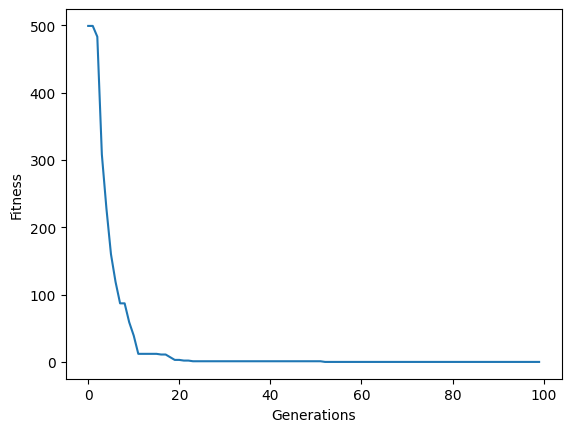

In [4]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()